In [5]:
import os

# Define the directory paths
directory_paths = ['D:\Jupyter NoteBOOK\Testing\glioma_tumor', 'D:\Jupyter NoteBOOK\Testing\meningioma_tumor', 'D:\Jupyter NoteBOOK\Testing\no_tumor', 'D:\Jupyter NoteBOOK\Testing\pituitary_tumor',
                  'D:\Jupyter NoteBOOK\Training\glioma_tumor', 'D:\Jupyter NoteBOOK\Training\meningioma_tumor', 'D:\Jupyter NoteBOOK\Training\no_tumor', 'D:\Jupyter NoteBOOK\Training\pituitary_tumor']

# Loop through each directory path
for directory_path in directory_paths:
    # Loop through all files in the directory and its subdirectories
    for dirname, _, filenames in os.walk(directory_path):
        for filename in filenames:
            # Print the full path of each file
            print(os.path.join(dirname, filename))


D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(1).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(10).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(100).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(11).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(12).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(13).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(14).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(15).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(16).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(17).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(18).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(19).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(2).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(20).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(21).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(22).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(23).jpg
D:\Jupyter NoteBOOK\Testing\glioma_tumor\image(24).jpg
D:\Jupyter 

<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
<>:5: SyntaxWarning: invalid escape sequence '\J'
C:\Users\Suryadipta Das\AppData\Local\Temp\ipykernel_11396\2134058151.py:4: SyntaxWarning: invalid escape sequence '\J'
  directory_paths = ['D:\Jupyter NoteBOOK\Testing\glioma_tumor', 'D:\Jupyter Not

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [8]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [12]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in labels:
    folderPath = os.path.join(r'D:\Jupyter NoteBOOK\Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r'D:\Jupyter NoteBOOK\Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [13]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [15]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.2957 - loss: 3.8500 - val_accuracy: 0.2891 - val_loss: 1.3655
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.3061 - loss: 1.3555 - val_accuracy: 0.4524 - val_loss: 1.3426
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 808s 10s/step - accuracy: 0.4618 - loss: 1.2403 - val_accuracy: 0.5170 - val_loss: 1.0696
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.5384 - loss: 1.0385 - val_accuracy: 0.5068 - val_loss: 1.1148
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.6219 - loss: 0.8911 - val_accuracy: 0.5782 - val_loss: 1.0313
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.6328 - loss: 0.8335 - val_accuracy: 0.5510 - val_loss: 1.1236
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 528s 6s/step - accuracy: 0.7011 - loss: 0.7456 - val_accuracy: 0.5850 - val_loss: 0.9410
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.7026 - loss: 0.6941 - val_accuracy: 0.5748 - 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

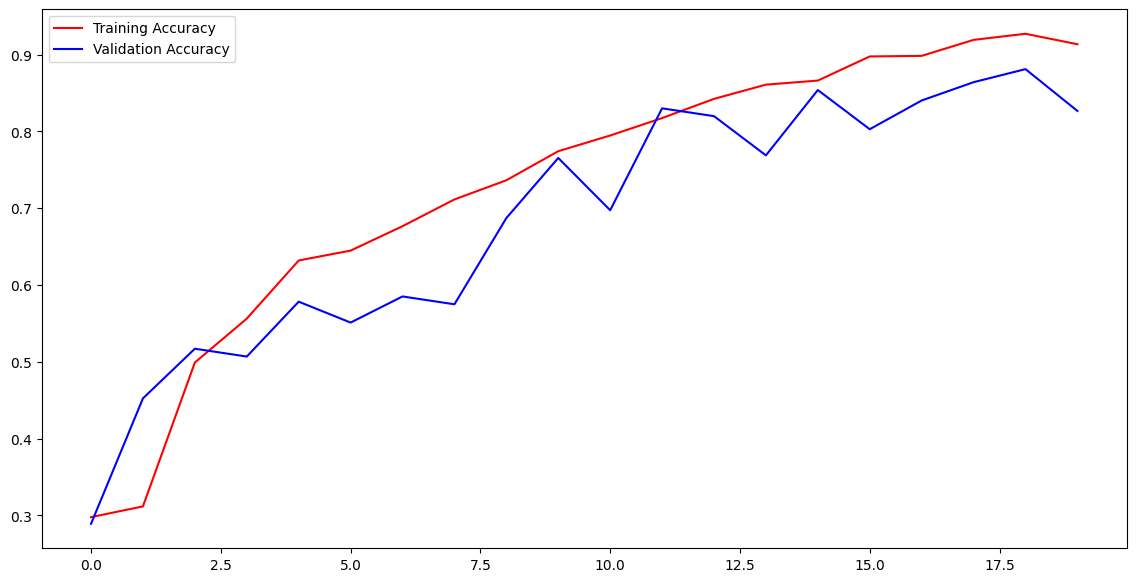

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

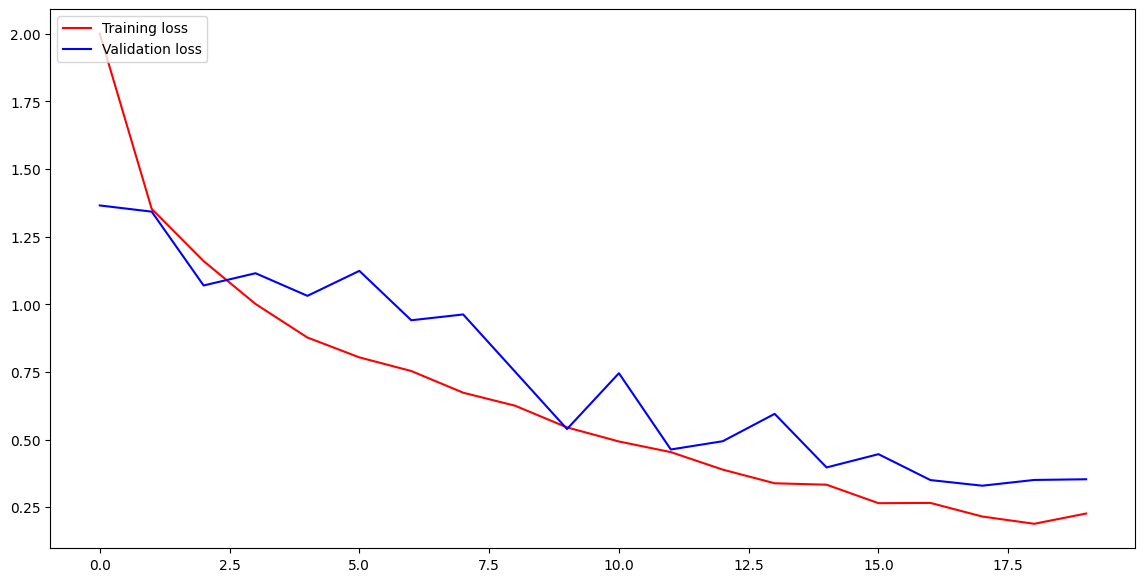

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [33]:
import cv2
import numpy as np

# Corrected file path with double backslashes
img = cv2.imread("D:\\Jupyter NoteBOOK\\Training\\pituitary_tumor\\p (156).jpg")

# Check if the image is loaded successfully
if img is not None:
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    print(img_array.shape)
else:
    print("Error: Unable to load the image.")



(150, 150, 3)


In [34]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

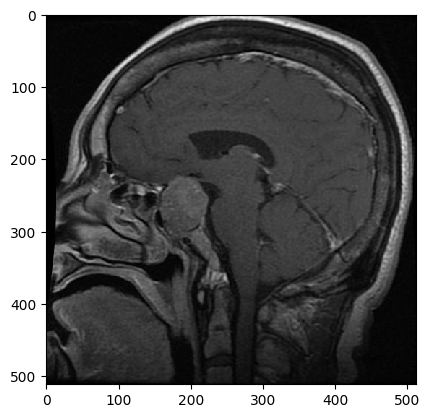

In [35]:
from tensorflow.keras.preprocessing import image
img = image.load_img('D:\\Jupyter NoteBOOK\\Training\\pituitary_tumor\\p (156).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [36]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


3

In [37]:
import pickle

In [38]:
filename ='BrainCancer_trained_model.sav'

In [40]:
pickle.dump(directory_paths, open(filename, 'wb'))

In [41]:
loaded_object = pickle.load(open(filename, 'rb'))